In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
df=pd.read_csv(Path('./Data/df_clean.csv'))
df.head()

,DATE,GDP,WTI,U_RATE,X_RATE,CPI,CR_GROWTH,NPL,M2,N_RESV,...,PRIME,T_PROV,S_PROV,M2_YYC,N_RESV_YYC,O_PROD_PC,N_GAS_PC,CR_GROWTH_YY,INFL,CEM_SALES_PC
0,Mar-95,2.4,18.4,18.1,5.9468,31.30,7072.3,9.0,9986.7,338.5,...,16.0,73.9,56.1,3.46%,-1597.79%,-0.08%,2.75%,NaN,5.3,13.97%
1,Jun-95,4.9,19.4,16.5,5.9466,31.87,7188.8,9.9,9934.4,358.9,...,15.0,66.8,50.5,6.85%,-753.73%,0.63%,3.34%,NaN,5.3,8.50%
2,Sep-95,3.6,17.8,17.8,5.9240,32.23,7169.1,9.4,9885.9,360.0,...,15.0,63.0,50.7,6.18%,3429.41%,-0.51%,4.71%,NaN,5.7,2.41%
3,Dec-95,4.2,18.2,16.3,5.9694,32.40,7188.3,10.2,10453.0,346.2,...,14.0,51.1,42.2,3.49%,32.19%,-1.38%,5.13%,NaN,3.8,8.87%
4,Mar-96,4.2,19.8,17.1,5.9995,32.43,7249.7,10.9,9944.2,331.2,...,15.5,44.4,37.5,-0.43%,-2.16%,1.50%,14.60%,2.51%,3.5,4.18%


In [3]:
df['NPL_Prediction']=df['NPL'].shift(1)

In [4]:
df.head()

,DATE,GDP,WTI,U_RATE,X_RATE,CPI,CR_GROWTH,NPL,M2,N_RESV,...,T_PROV,S_PROV,M2_YYC,N_RESV_YYC,O_PROD_PC,N_GAS_PC,CR_GROWTH_YY,INFL,CEM_SALES_PC,NPL_Prediction
0,Mar-95,2.4,18.4,18.1,5.9468,31.30,7072.3,9.0,9986.7,338.5,...,73.9,56.1,3.46%,-1597.79%,-0.08%,2.75%,NaN,5.3,13.97%,NaN
1,Jun-95,4.9,19.4,16.5,5.9466,31.87,7188.8,9.9,9934.4,358.9,...,66.8,50.5,6.85%,-753.73%,0.63%,3.34%,NaN,5.3,8.50%,9.0
2,Sep-95,3.6,17.8,17.8,5.9240,32.23,7169.1,9.4,9885.9,360.0,...,63.0,50.7,6.18%,3429.41%,-0.51%,4.71%,NaN,5.7,2.41%,9.9
3,Dec-95,4.2,18.2,16.3,5.9694,32.40,7188.3,10.2,10453.0,346.2,...,51.1,42.2,3.49%,32.19%,-1.38%,5.13%,NaN,3.8,8.87%,9.4
4,Mar-96,4.2,19.8,17.1,5.9995,32.43,7249.7,10.9,9944.2,331.2,...,44.4,37.5,-0.43%,-2.16%,1.50%,14.60%,2.51%,3.5,4.18%,10.2


In [5]:
y_true = df.iloc[1:]['NPL']
y_pred = df.iloc[1:]['NPL_Prediction']

<AxesSubplot:>

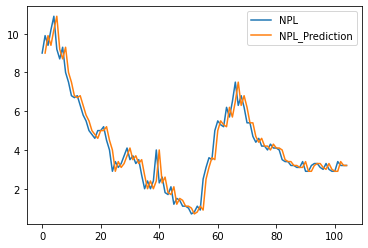

In [10]:
df[['NPL', 'NPL_Prediction']].plot()

### Mean Squared Error

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_true, y_pred))

0.33903846153846157


### Root Mean Squared Error

In [7]:
print(mean_squared_error(y_true, y_pred, squared=False))

0.5822700932887259


### R-Squared

In [9]:
r2_score(y_true, y_pred)

0.9280217765609898